In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
print("Shape of X_train:", X_train.shape)
print("First element of X_train:\n", X_train[0])

Shape of X_train: (60000, 28, 28)
First element of X_train:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [ 

In [7]:
print("Shape of y_train:", y_train.shape)
print("First 10 elements of y_train:\n", y_train[:10])

Shape of y_train: (60000,)
First 10 elements of y_train:
 [5 0 4 1 9 2 1 3 1 4]


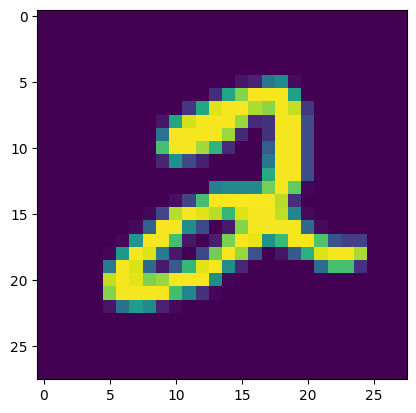

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8586 - loss: 0.4947 - val_accuracy: 0.9578 - val_loss: 0.1447
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9643 - loss: 0.1242 - val_accuracy: 0.9687 - val_loss: 0.1062
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9753 - loss: 0.0826 - val_accuracy: 0.9677 - val_loss: 0.1060
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9799 - loss: 0.0643 - val_accuracy: 0.9695 - val_loss: 0.1005
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9848 - loss: 0.0468 - val_accuracy: 0.9737 - val_loss: 0.0942
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9737 - val_loss: 0.0955
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9901 - loss: 0.0288 - val_accuracy: 0.9728 - val_loss: 0.1053
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9928 - loss: 0.02

In [18]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
y_prob[0]

array([8.0814617e-15, 4.7305740e-15, 6.1332458e-12, 1.9046309e-09,
       5.2954912e-28, 4.6813253e-18, 5.3188125e-21, 9.9999994e-01,
       1.0178909e-11, 4.8267022e-11], dtype=float32)

In [22]:
y_pred = y_prob.argmax(axis=1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9692

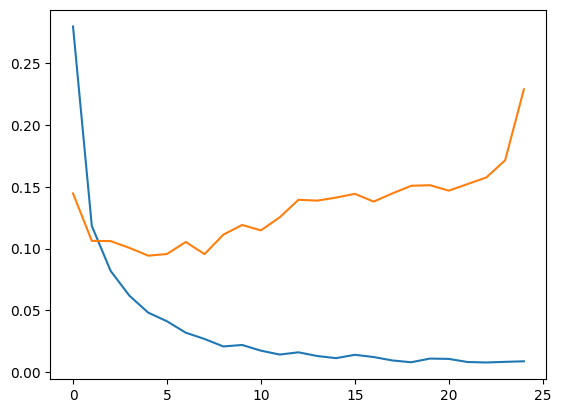

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

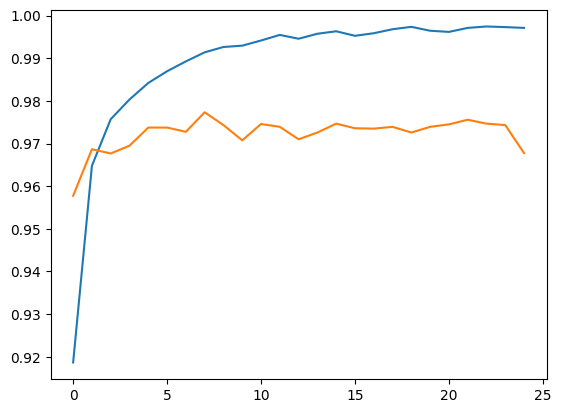

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

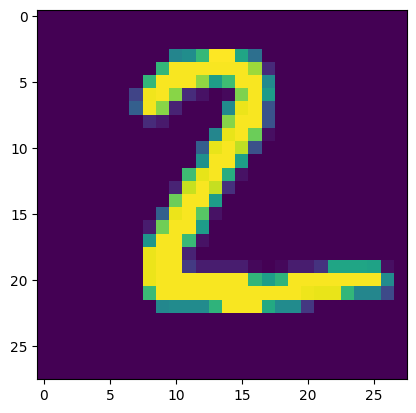

In [26]:
plt.imshow(X_test[1])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([2])

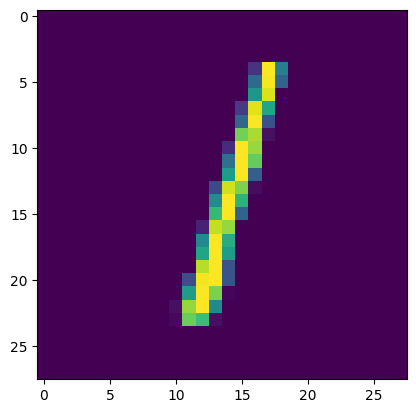

In [28]:
plt.imshow(X_test[2])

In [29]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([1])

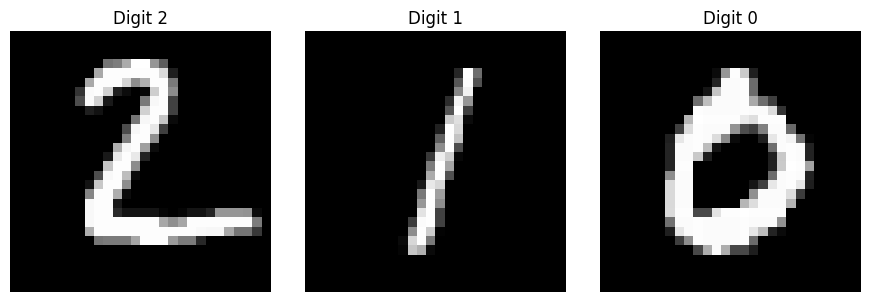

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))  # 1 row, 3 columns
for i, ax in enumerate(axes):
    ax.imshow(X_test[i + 1], cmap='gray')      # index from 1 to 3
    ax.set_title(f"Digit {y_test[i + 1]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [32]:
# Select a batch of 3 images
X_batch = X_test[1:4]  # shape: (3, 28, 28)

# Predict class probabilities
y_prob_batch = model.predict(X_batch)

# Get predicted class labels
y_pred_batch = y_prob_batch.argmax(axis=1)

print("Predicted labels for images 1–3:", y_pred_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted labels for images 1–3: [2 1 0]
